In [2]:
import pandas as pd

# Load dataset
train = pd.read_csv('train(1).csv')

# Remove Cabin, Name and Ticket attributes
train = train.drop(['Cabin', 'Name', 'Ticket'], axis=1)

# Save cleaned dataset
train.to_csv('cleaned_train.csv', index=False)

missing_values = train.isnull()

# contar valores faltantes por columna
print(missing_values.sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [3]:
# Rellenar valores nulos de Age con la mediana
median_age = train['Age'].median()
train['Age'].fillna(median_age, inplace=True)

# Rellenar valores nulos de Embarked con la moda
mode_embarked = train['Embarked'].mode()[0]
train['Embarked'].fillna(mode_embarked, inplace=True)


In [4]:
missing_values = train.isnull()

# contar valores faltantes por columna
print(missing_values.sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<AxesSubplot:>

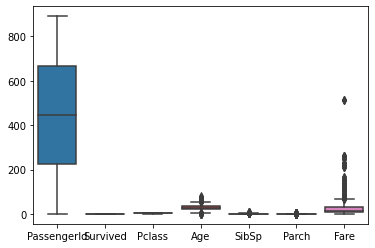

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=train) #verificar si hay valores atípicos

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Codificación de variables categóricas en variables numéricas
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'])

In [8]:
# Simplificación de valores
train['SibSp'] = train['SibSp'].replace([1, 2], '1-2')
train['SibSp'] = train['SibSp'].replace([3, 4, 5, 8], '3+')

train['Parch'] = train['Parch'].replace([1, 2], '1-2')
train['Parch'] = train['Parch'].replace([3, 4, 5, 6], '3+')


In [9]:
train['Age'] = pd.cut(train['Age'], bins=[0, 18, 50, 100], labels=['menores de 18 años', 'entre 18 y 50 años', 'mayores de 50 años'])

In [11]:
# Agrupación de valores continuos
train['Fare'] = pd.cut(train['Fare'], bins=[0, 30, 150, 1000], labels=['barato', 'caro', 'muy caro'])

In [19]:
print(train.head())

   PassengerId  Survived  Pclass  Sex                 Age SibSp Parch    Fare  \
0            1         0       3    1  entre 18 y 50 años   1-2     0  barato   
1            2         1       1    0  entre 18 y 50 años   1-2     0    caro   
2            3         1       3    0  entre 18 y 50 años     0     0  barato   
3            4         1       1    0  entre 18 y 50 años   1-2     0    caro   
4            5         0       3    1  entre 18 y 50 años     0     0  barato   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  


In [26]:
import pandas as pd
import seaborn as sns


# Correlación entre variables
corr_matrix = train.corr().abs()

# Seleccionar triángulo superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Obtener las variables con una correlación mayor a 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Eliminar las variables de alta correlación
titanic_df = train.drop(to_drop, axis=1)


C:\Users\saram\AppData\Local\Temp/ipykernel_10836/3088703570.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [29]:
from sklearn.ensemble import ExtraTreesClassifier

# Eliminar variables no numéricas y la columna 'Survived'
train =train.select_dtypes(include=[np.number]).drop(['Survived'], axis=1)

# Crear un modelo de ExtraTreesClassifier
model = ExtraTreesClassifier()

# Entrenar el modelo
model.fit(train, train)

# Obtener la importancia de cada atributo
feature_importances = pd.Series(model.feature_importances_, index=train.columns)

# Seleccionar los atributos más importantes
selected_features = feature_importances.nlargest(7).index.tolist()

# Seleccionar solo los atributos más importantes
train = train[selected_features]


In [31]:
from sklearn.decomposition import PCA

# Normalizar los datos
train = (train - train.mean()) / train.std()

# Crear un modelo de PCA
pca = PCA(n_components=3)

# Proyectar los datos en el nuevo espacio de características
titanic_df_pca = pca.fit_transform(train)
